<a href="https://colab.research.google.com/github/DrsimpleMugo/Pneumonia-Detection-in-chest-Xray-Images/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import callbacks,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
print('successful')

successful


In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/chest_xray/train'
test_path = '/content/drive/MyDrive/chest_xray/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False )

87916544/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in inception.layers:
   layer.trainable = False

In [ ]:
folders = glob ('/content/drive/MyDrive/chest_xray/train/*')

In [ ]:
folders

['/content/drive/MyDrive/chest_xray/train/PNEUMONIA',
 '/content/drive/MyDrive/chest_xray/train/NORMAL']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs = inception.input, outputs=prediction)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [ ]:
elst = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
save_ck = callbacks.ModelCheckpoint('/content/drive/MyDrive/Pneumonia.h5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')


Found 1748 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 506 images belonging to 2 classes.


In [ ]:
r = model.fit(
    training_set,
    validation_data = test_set,
    #callbacks = [elst, save_ck],
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps=len(test_set) 
)

Epoch 1/50
110/110 [==============================] - 1209s 11s/step - loss: 1.1914 - accuracy: 0.8896 - val_loss: 2.0525 - val_accuracy: 0.8577
Epoch 2/50
110/110 [==============================] - 55s 495ms/step - loss: 0.5367 - accuracy: 0.9388 - val_loss: 2.3549 - val_accuracy: 0.8538
Epoch 3/50
110/110 [==============================] - 55s 500ms/step - loss: 0.9917 - accuracy: 0.9359 - val_loss: 4.4770 - val_accuracy: 0.8281
Epoch 5/50
110/110 [==============================] - 55s 498ms/step - loss: 0.6767 - accuracy: 0.9519 - val_loss: 3.4050 - val_accuracy: 0.8775
Epoch 6/50
110/110 [==============================] - 54s 492ms/step - loss: 0.5103 - accuracy: 0.9651 - val_loss: 2.6525 - val_accuracy: 0.8814
Epoch 7/50
110/110 [==============================] - 54s 493ms/step - loss: 0.3917 - accuracy: 0.9622 - val_loss: 7.5184 - val_accuracy: 0.7589
Epoch 8/50
110/110 [==============================] - 54s 492ms/step - loss: 0.4706 - accuracy: 0.9662 - val_loss: 6.5094 - val_ac

In [ ]:
import matplotlib.pyplot as plt

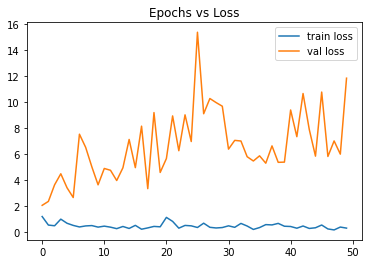

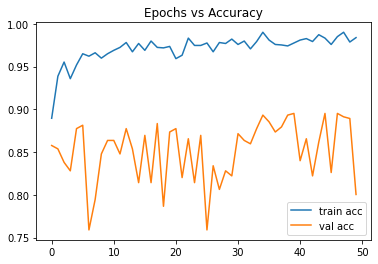

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title("Epochs vs Loss")
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Epochs vs Accuracy")
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.0000000e+00, 1.0000000e+00],
       [1.9507575e-13, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [9.9997878e-01, 2.1162512e-05],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model.save('/content/drive/MyDrive/Pneumonia3.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/Pneumonia3.h5')

In [ ]:
img = image.load_img('/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0133-0001.jpeg', target_size = (224,224))

In [ ]:
arr_img = image.img_to_array(img)

In [ ]:
arr_img

array([[[60., 60., 60.],
        [58., 58., 58.],
        [51., 51., 51.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[61., 61., 61.],
        [59., 59., 59.],
        [55., 55., 55.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[60., 60., 60.],
        [57., 57., 57.],
        [52., 52., 52.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [ ]:
arr_img = arr_img/255

In [ ]:
import numpy as np
arr_img = np.expand_dims(arr_img, axis = 0)
img_data = preprocess_input(arr_img)
img_data.shape

(1, 224, 224, 3)

In [ ]:
prediction = model.predict(img_data)

prediction

array([[0.9965299 , 0.00347016]], dtype=float32)

In [ ]:
class_img = np.argmax(prediction, axis = 1)

class_img

array([0])